In [2]:
import math
from matplotlib import pyplot as plt
import torch
from dataset import load_data
from torch.utils.data import DataLoader
from torch import nn
from model import MLP
from optimizer import SGD,ADAM,AdaGrad,RMSprop,SGD_Momentum
from train import train
import pandas as pd
import numpy as np
import time

Get dataset

In [3]:
torch.manual_seed(100)
batch_size = 100
train_input, train_target, test_input, test_target = load_data(train_size=60000, test_size=10000, cifar = None,  normalize = False, flatten = True)
train_loader = DataLoader(list(zip(train_input, train_target)), batch_size)
test_loader = DataLoader(list(zip(test_input, test_target)), batch_size)
# Cross entropy as loss
criterion = nn.CrossEntropyLoss()

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 60000 train and 10000 test samples


### A. Comparison of SGD, PSGD, FWGD

### 1. Comparison of sparsity

#### A.1.1 PSGD

In [3]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1, project = True, FW = False, lr = 0.01)
loss_tr_hist_psgd, loss_te_hist_psgd, acc_train_hist_psgd, acc_test_hist_ = train(train_loader, test_loader,
          model, optimizer, criterion, epochs = 100)

Epoch 1/100:   0%|          | 0/60000 [00:00<?, ?img/s]/home/wei/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Epoch 100/100: 100%|██████████| 60000/60000 [00:03<00:00, 18055.51img/s, test accuracy=0.968, test loss=87.1, train acccuracy=0.972, train loss=519]


In [4]:
pgd = torch.Tensor()
for param_tensor in model.state_dict():
    pgd = torch.cat([pgd, model.state_dict()[param_tensor].view(-1)])

The parameter range of 80%:

In [5]:
print([np.percentile(pgd, 10), np.percentile(pgd, 90)])

[-0.009370056353509426, 0.009395108558237563]


The parameter range of 90%:

In [6]:
print([np.percentile(pgd, 5), np.percentile(pgd, 95)])

[-0.033458078280091286, 0.03327476270496847]


#### A.1.2 FW

In [7]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1, step_size = 1, project = False, FW = True)
loss_tr_hist_fw, loss_te_hist_fw, acc_train_hist_fw, acc_test_hist_fw = train(train_loader, test_loader,
          model, optimizer, criterion, epochs=100)

Epoch 100/100: 100%|██████████| 60000/60000 [00:01<00:00, 32734.63img/s, test accuracy=0.932, test loss=95.2, train acccuracy=0.938, train loss=567]


In [9]:
fw = torch.Tensor()
for param_tensor in model.state_dict():
    fw = torch.cat([fw, model.state_dict()[param_tensor].view(-1)])

The parameter range of 80%:

In [10]:
print([np.percentile(fw, 10), np.percentile(fw, 90)])

[-1.5505962238648863e-07, 1.62073146725561e-07]


The parameter range of 90%:

In [11]:
print([np.percentile(fw, 5), np.percentile(fw, 95)])

[-0.0005214153061388063, 0.0005982558941468596]


#### A.1.3 SGD

In [12]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  project = False, FW = False, lr = 0.01)
loss_tr_hist_sgd, loss_te_hist_sgd, acc_train_hist_sgd, acc_test_hist_sgd = train(train_loader, test_loader,
          model, optimizer, criterion, epochs = 100)

Epoch 100/100: 100%|██████████| 60000/60000 [00:01<00:00, 41498.59img/s, test accuracy=0.971, test loss=85.4, train acccuracy=0.98, train loss=502]


In [13]:
sgd = torch.Tensor()
for param_tensor in model.state_dict():
    sgd = torch.cat([sgd, model.state_dict()[param_tensor].view(-1)])

The parameter range of 80%:

In [14]:
print([np.percentile(sgd, 10), np.percentile(sgd, 90)])

[-0.07616254687309265, 0.07628444060683251]


The parameter range of 90%:

In [162]:
print([np.percentile(sgd, 5), np.percentile(sgd, 95)])

[-0.10189245827496052, 0.10260736756026746]


### 2. Comparison of accuracy

#### A.2.1 PSGD

In [15]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1, project = True, FW = False, lr = 0.01)
loss_tr_hist_psgd, loss_te_hist_psgd, acc_train_hist_psgd, acc_test_hist_ = train(train_loader, test_loader,
          model, optimizer, criterion, epochs =500)

Epoch 110/500: 100%|██████████| 60000/60000 [00:03<00:00, 17570.84img/s, test accuracy=0.968, test loss=86.7, train acccuracy=0.973, train loss=516]


Epoch 220/500: 100%|██████████| 60000/60000 [00:03<00:00, 15803.70img/s, test accuracy=0.965, test loss=87.2, train acccuracy=0.967, train loss=521]


Epoch 330/500: 100%|██████████| 60000/60000 [00:03<00:00, 17497.19img/s, test accuracy=0.963, test loss=87.1, train acccuracy=0.965, train loss=520]


Epoch 440/500: 100%|██████████| 60000/60000 [00:03<00:00, 19523.93img/s, test accuracy=0.963, test loss=87, train acccuracy=0.964, train loss=520]


Epoch 500/500: 100%|██████████| 60000/60000 [00:03<00:00, 19570.67img/s, test accuracy=0.958, test loss=87.9, train acccuracy=0.958, train loss=526]


#### A.2.2 FW

In [16]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1, step_size = 1, project = False, FW = True)
loss_tr_hist_fw, loss_te_hist_fw, acc_train_hist_fw, acc_test_hist_fw = train(train_loader, test_loader,
          model, optimizer, criterion, epochs=500)

Epoch 110/500: 100%|██████████| 60000/60000 [00:02<00:00, 22561.84img/s, test accuracy=0.933, test loss=95.2, train acccuracy=0.938, train loss=567]


Epoch 220/500: 100%|██████████| 60000/60000 [00:02<00:00, 23186.52img/s, test accuracy=0.933, test loss=95.5, train acccuracy=0.936, train loss=570]


Epoch 330/500: 100%|██████████| 60000/60000 [00:02<00:00, 29816.69img/s, test accuracy=0.93, test loss=95.4, train acccuracy=0.936, train loss=570]


Epoch 440/500: 100%|██████████| 60000/60000 [00:02<00:00, 26909.81img/s, test accuracy=0.929, test loss=95.6, train acccuracy=0.934, train loss=571]


Epoch 500/500: 100%|██████████| 60000/60000 [00:02<00:00, 29792.52img/s, test accuracy=0.929, test loss=95.8, train acccuracy=0.934, train loss=572]


#### A.2.3 SGD

In [17]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  project = False, FW = False, lr = 0.01)
loss_tr_hist_sgd, loss_te_hist_sgd, acc_train_hist_sgd, acc_test_hist_sgd = train(train_loader, test_loader,
          model, optimizer, criterion, epochs = 500)

Epoch 110/500: 100%|██████████| 60000/60000 [00:01<00:00, 47178.96img/s, test accuracy=0.969, test loss=85.4, train acccuracy=0.981, train loss=501]


Epoch 220/500: 100%|██████████| 60000/60000 [00:01<00:00, 46341.70img/s, test accuracy=0.973, test loss=84.9, train acccuracy=0.989, train loss=492]


Epoch 329/500: 100%|██████████| 60000/60000 [00:01<00:00, 47690.60img/s, test accuracy=0.973, test loss=84.8, train acccuracy=0.993, train loss=487]


Epoch 438/500: 100%|██████████| 60000/60000 [00:01<00:00, 45475.14img/s, test accuracy=0.974, test loss=85, train acccuracy=0.996, train loss=482]


Epoch 500/500: 100%|██████████| 60000/60000 [00:01<00:00, 47662.04img/s, test accuracy=0.974, test loss=85, train acccuracy=0.996, train loss=482]


Plot the result

In [18]:
def plot(item,x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    color_t1 = 'tab:gray'
    color_t2 = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, item[0], color=color_tr)
    ax1.plot(x_var, item[1], color=color_te)
    ax1.plot(x_var, item[2], color=color_tra)
    ax1.set_ylabel("test accuracy")
    ax1.legend(["SGD", "PSGD", "FWGD"])

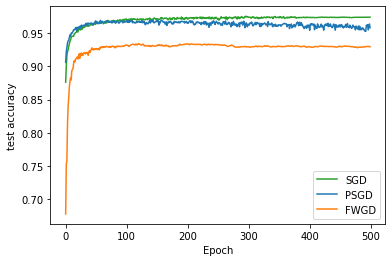

In [21]:
item = [acc_test_hist_sgd, acc_test_hist_, acc_test_hist_fw]
plot(item, np.arange(500), "Epoch")

### A.3. Comparison of time measure

#### A.3.1 FW

In [7]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1, step_size = 1, project = False, FW = True)
train_time(train_loader, test_loader,
          model, optimizer, criterion, epochs=500)

--- 646.8905210494995 seconds ---


#### A.3.2 SGD

In [4]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(), project = False, FW = False, lr = 0.01)
train_time(train_loader, test_loader,
          model, optimizer, criterion, epochs= 500)

--- 328.63276076316833 seconds ---


#### A.3.3 PSGD

In [5]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1, step_size = 1, project = True, FW = False, lr = 0.01, momentum = 0)
train_time(train_loader, test_loader,
          model, optimizer, criterion, epochs=500)

--- 1242.0787417888641 seconds ---


### B. Hyperparameter and l-p norm in Frank Wolfe algorithm

### B.1. Step size

#### B.1.1 Default step size

In [23]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1,step_size = 2, project = False, FW = True)
loss_tr_hist_s1, loss_te_hist_s1, acc_train_hist_s1, acc_test_hist_s1 = train(train_loader, test_loader,
          model, optimizer, criterion, epochs=500)

Epoch 1/500:   0%|          | 0/60000 [00:00<?, ?img/s]/home/wei/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Epoch 108/500: 100%|██████████| 60000/60000 [00:01<00:00, 31690.40img/s, test accuracy=0.902, test loss=99.7, train acccuracy=0.907, train loss=595]


Epoch 218/500: 100%|██████████| 60000/60000 [00:01<00:00, 33008.71img/s, test accuracy=0.9, test loss=99.6, train acccuracy=0.909, train loss=591]


Epoch 328/500: 100%|██████████| 60000/60000 [00:01<00:00, 30386.95img/s, test accuracy=0.906, test loss=98.9, train acccuracy=0.913, train loss=588]


Epoch 438/500: 100%|██████████| 60000/60000 [00:01<00:00, 31300.47img/s, test accuracy=0.906, test loss=99, train acccuracy=0.915, train loss=587]


Epoch 500/500: 100%|██████████| 60000/60000 [00:02<00:00, 29392.63img/s, test accuracy=0.903, test loss=99.2, train acccuracy=0.915, train loss=587]


####  B.2.2 Modified step size

In [24]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1,step_size = 1, project = False, FW = True)
loss_tr_hist_s2, loss_te_hist_s2, acc_train_hist_s2, acc_test_hist_s2 = train(train_loader, test_loader,
          model, optimizer, criterion, epochs=500)

Epoch 110/500: 100%|██████████| 60000/60000 [00:02<00:00, 27527.80img/s, test accuracy=0.933, test loss=95.2, train acccuracy=0.938, train loss=567]


Epoch 220/500: 100%|██████████| 60000/60000 [00:02<00:00, 26733.78img/s, test accuracy=0.933, test loss=95.5, train acccuracy=0.936, train loss=570]


Epoch 330/500: 100%|██████████| 60000/60000 [00:02<00:00, 26946.42img/s, test accuracy=0.93, test loss=95.4, train acccuracy=0.936, train loss=570]


Epoch 440/500: 100%|██████████| 60000/60000 [00:02<00:00, 25113.48img/s, test accuracy=0.929, test loss=95.6, train acccuracy=0.934, train loss=571]


Epoch 500/500: 100%|██████████| 60000/60000 [00:02<00:00, 24637.46img/s, test accuracy=0.929, test loss=95.8, train acccuracy=0.934, train loss=572]


#### B.1.3 Adaptive step size

In [25]:
torch.manual_seed(100)
model = MLP(input_channels = 14*14, output_channels = 10)
optimizer = SGD(model.parameters(),  kappa = 175, l = 1,step_size = 0, project = False, FW = True)
loss_tr_hist_s3, loss_te_hist_s3, acc_train_hist_s3, acc_test_hist_s3 = train(train_loader, test_loader,
          model, optimizer, criterion, epochs=500)

Epoch 110/500: 100%|██████████| 60000/60000 [00:04<00:00, 14449.44img/s, test accuracy=0.93, test loss=98.1, train acccuracy=0.929, train loss=587]


Epoch 220/500: 100%|██████████| 60000/60000 [00:04<00:00, 13533.18img/s, test accuracy=0.93, test loss=95.5, train acccuracy=0.94, train loss=565]


Epoch 330/500: 100%|██████████| 60000/60000 [00:04<00:00, 14016.44img/s, test accuracy=0.939, test loss=92.9, train acccuracy=0.951, train loss=548]


Epoch 440/500: 100%|██████████| 60000/60000 [00:04<00:00, 13669.98img/s, test accuracy=0.942, test loss=92.1, train acccuracy=0.955, train loss=541]


Epoch 500/500: 100%|██████████| 60000/60000 [00:04<00:00, 13750.08img/s, test accuracy=0.943, test loss=91.9, train acccuracy=0.957, train loss=538]


In [42]:
from matplotlib import pyplot as plt
torch.manual_seed(100)
def plot(item,x_var, xlabel, ylabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:orange'
    color_te = 'tab:blue'
    color_tra = 'tab:green'
    color_tea = 'tab:purple'
    color_t1 = 'tab:gray'
    color_t2 = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.plot(x_var, item[0], color=color_tr)
    ax1.plot(x_var, item[1], color=color_te)
    ax1.plot(x_var, item[2], color=color_tra)
    ax1.legend(["default step",  "modified step", "ada step"])
    plt.grid()

#### Plot loss

In [43]:
acc_te = [acc_test_hist_s1, acc_test_hist_s2, acc_test_hist_s3]

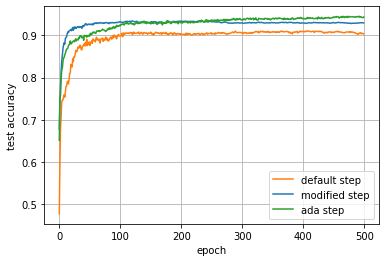

In [45]:
plot(acc_te,torch.arange(500), "epoch", "test accuracy")

#### Plot accuracy

In [47]:
acc_te = [loss_tr_hist_s1, loss_tr_hist_s2, loss_tr_hist_s3]

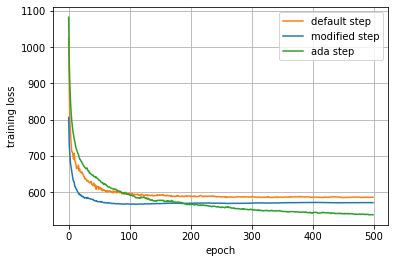

In [48]:
plot(acc_te,torch.arange(500), "epoch", "training loss")

### B.2. L-p norm

Get the result of l-1, l-2, l-inf norm constraint

In [ ]:
df = pd.DataFrame()
df_param = pd.DataFrame()
kappas = [175, 5, 0.1]
ls = [1,2,math.inf]
for i in range(3):
    torch.manual_seed(100)
    model = MLP(input_channels = 14*14, output_channels = 10)
    optimizer = SGD(model.parameters(),  kappa = kappas[i], l = ls[i], step_size=0, project = False, FW = True)
    loss_tr_hist, loss_te_hist, acc_train_hist, acc_test_hist = train(train_loader, test_loader,
              model, optimizer, criterion, epochs=100)
    df[i] = acc_test_hist
df.to_pickle("result_log/fwlp_0.pkl")

Plot the result

In [22]:
fwlp_0 = pd.read_pickle("result_log/fwlp_0.pkl")

In [28]:
def plot(item,x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    color_t1 = 'tab:gray'
    color_t2 = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, item[0], color=color_tr)
    ax1.plot(x_var, item[1], color=color_te)
    ax1.plot(x_var, item[2], color=color_tra)
    ax1.set_ylabel("test accuracy")
    ax1.legend(["l-1 kappa=175", "l-2 kappa=5", "l-inf kappa=0.1"])

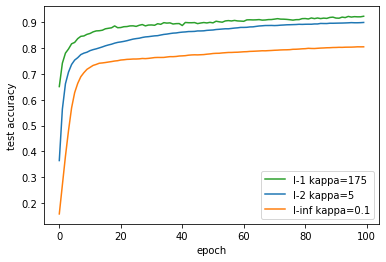

In [29]:
plot([fwlp_0[0],fwlp_0[1],fwlp_0[2]], np.arange(100), "epoch")

### B.3. Kappa

Get the result

In [5]:
# Set batch size to 1000
torch.manual_seed(100)
batch_size = 1000
train_input, train_target, test_input, test_target = load_data(train_size=60000, test_size=10000, cifar = None,  normalize = False, flatten = True)
train_loader = DataLoader(list(zip(train_input, train_target)), batch_size)
test_loader = DataLoader(list(zip(test_input, test_target)), batch_size)


df = pd.DataFrame()
kappa_list=[1,50,175,500,1000]
epochnum=500
ep_rk=list(range(epochnum))
df['epoch']=ep_rk
for k in kappa_list:
    torch.manual_seed(100)
    model = MLP(input_channels = 14*14, output_channels = 10)
    optimizer = SGD(model.parameters(),  kappa = k, step_size=1, project = False, FW = True)
    loss_tr_hist, loss_te_hist, acc_train_hist, acc_test_hist = train(train_loader, test_loader,
              model, optimizer, criterion, epochs=epochnum)
    df['kappa='+str(k)+'acc']=acc_test_hist
df.to_csv('result_log/kappa.csv', index=False)  

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 60000 train and 10000 test samples


Epoch 55/500: 100%|██████████| 60000/60000 [00:01<00:00, 36643.18img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 110/500: 100%|██████████| 60000/60000 [00:01<00:00, 42129.35img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 165/500: 100%|██████████| 60000/60000 [00:01<00:00, 43379.34img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 220/500: 100%|██████████| 60000/60000 [00:01<00:00, 42375.13img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 275/500: 100%|██████████| 60000/60000 [00:01<00:00, 40889.54img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 330/500: 100%|██████████| 60000/60000 [00:01<00:00, 46616.88img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 385/500: 100%|██████████| 60000/60000 [00:01<00:00, 45097.27img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 440/500: 100%|██████████| 60000/60000 [00:01<00:00, 45030.32img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 495/500: 100%|██████████| 60000/60000 [00:01<00:00, 45762.54img/s, test accuracy=0.209, test loss=22.6, train acccuracy=0.21, train loss=136]


Epoch 50/500: 100%|██████████| 60000/60000 [00:01<00:00, 42585.69img/s, test accuracy=0.569, test loss=12.7, train acccuracy=0.567, train loss=76.2]


Epoch 105/500: 100%|██████████| 60000/60000 [00:01<00:00, 45142.74img/s, test accuracy=0.571, test loss=12.6, train acccuracy=0.568, train loss=75.3]


Epoch 159/500: 100%|██████████| 60000/60000 [00:01<00:00, 39639.53img/s, test accuracy=0.568, test loss=12.6, train acccuracy=0.568, train loss=75.2]


Epoch 213/500: 100%|██████████| 60000/60000 [00:01<00:00, 41088.23img/s, test accuracy=0.569, test loss=12.5, train acccuracy=0.567, train loss=74.9]


Epoch 267/500: 100%|██████████| 60000/60000 [00:01<00:00, 36058.72img/s, test accuracy=0.569, test loss=12.4, train acccuracy=0.566, train loss=74.2]


Epoch 322/500: 100%|██████████| 60000/60000 [00:01<00:00, 42473.56img/s, test accuracy=0.569, test loss=12.3, train acccuracy=0.566, train loss=73.9]


Epoch 376/500: 100%|██████████| 60000/60000 [00:01<00:00, 42207.89img/s, test accuracy=0.57, test loss=12.3, train acccuracy=0.565, train loss=73.7]


Epoch 430/500: 100%|██████████| 60000/60000 [00:01<00:00, 41464.47img/s, test accuracy=0.572, test loss=12.2, train acccuracy=0.566, train loss=73.5]


Epoch 484/500: 100%|██████████| 60000/60000 [00:01<00:00, 41904.58img/s, test accuracy=0.57, test loss=12.3, train acccuracy=0.568, train loss=73.4]


Epoch 39/500: 100%|██████████| 60000/60000 [00:01<00:00, 45148.11img/s, test accuracy=0.872, test loss=10.4, train acccuracy=0.871, train loss=62.7]


Epoch 94/500: 100%|██████████| 60000/60000 [00:01<00:00, 42804.22img/s, test accuracy=0.905, test loss=9.8, train acccuracy=0.91, train loss=58.7]


Epoch 148/500: 100%|██████████| 60000/60000 [00:01<00:00, 43257.70img/s, test accuracy=0.912, test loss=9.65, train acccuracy=0.924, train loss=57.2]


Epoch 202/500: 100%|██████████| 60000/60000 [00:01<00:00, 43459.26img/s, test accuracy=0.921, test loss=9.55, train acccuracy=0.932, train loss=56.6]


Epoch 256/500: 100%|██████████| 60000/60000 [00:01<00:00, 42618.63img/s, test accuracy=0.924, test loss=9.51, train acccuracy=0.935, train loss=56.2]


Epoch 310/500: 100%|██████████| 60000/60000 [00:01<00:00, 43232.40img/s, test accuracy=0.927, test loss=9.45, train acccuracy=0.938, train loss=55.9]


Epoch 364/500: 100%|██████████| 60000/60000 [00:01<00:00, 45160.47img/s, test accuracy=0.93, test loss=9.4, train acccuracy=0.939, train loss=55.7]


Epoch 418/500: 100%|██████████| 60000/60000 [00:01<00:00, 43126.76img/s, test accuracy=0.928, test loss=9.43, train acccuracy=0.937, train loss=55.8]


Epoch 472/500: 100%|██████████| 60000/60000 [00:01<00:00, 37078.52img/s, test accuracy=0.93, test loss=9.41, train acccuracy=0.938, train loss=55.8]


Epoch 27/500: 100%|██████████| 60000/60000 [00:01<00:00, 39383.43img/s, test accuracy=0.811, test loss=11.6, train acccuracy=0.812, train loss=69.6]


Epoch 82/500: 100%|██████████| 60000/60000 [00:01<00:00, 40706.46img/s, test accuracy=0.891, test loss=9.98, train acccuracy=0.891, train loss=60]


Epoch 137/500: 100%|██████████| 60000/60000 [00:01<00:00, 45418.77img/s, test accuracy=0.909, test loss=9.65, train acccuracy=0.911, train loss=57.9]


Epoch 191/500: 100%|██████████| 60000/60000 [00:01<00:00, 40419.36img/s, test accuracy=0.918, test loss=9.52, train acccuracy=0.922, train loss=56.7]


Epoch 245/500: 100%|██████████| 60000/60000 [00:01<00:00, 42553.54img/s, test accuracy=0.923, test loss=9.43, train acccuracy=0.931, train loss=55.9]


Epoch 299/500: 100%|██████████| 60000/60000 [00:01<00:00, 39040.39img/s, test accuracy=0.929, test loss=9.29, train acccuracy=0.938, train loss=55.1]


Epoch 354/500: 100%|██████████| 60000/60000 [00:01<00:00, 43251.80img/s, test accuracy=0.928, test loss=9.31, train acccuracy=0.939, train loss=55]


Epoch 408/500: 100%|██████████| 60000/60000 [00:01<00:00, 47295.96img/s, test accuracy=0.932, test loss=9.27, train acccuracy=0.942, train loss=54.6]


Epoch 462/500: 100%|██████████| 60000/60000 [00:01<00:00, 38683.08img/s, test accuracy=0.933, test loss=9.23, train acccuracy=0.945, train loss=54.3]


Epoch 16/500: 100%|██████████| 60000/60000 [00:01<00:00, 40540.55img/s, test accuracy=0.494, test loss=16.7, train acccuracy=0.498, train loss=99.6]


Epoch 71/500: 100%|██████████| 60000/60000 [00:01<00:00, 39320.90img/s, test accuracy=0.797, test loss=11.5, train acccuracy=0.794, train loss=69.2]


Epoch 125/500: 100%|██████████| 60000/60000 [00:01<00:00, 35471.93img/s, test accuracy=0.814, test loss=11.2, train acccuracy=0.815, train loss=66.9]


Epoch 180/500: 100%|██████████| 60000/60000 [00:01<00:00, 41065.14img/s, test accuracy=0.818, test loss=11, train acccuracy=0.822, train loss=65.8]


Epoch 235/500: 100%|██████████| 60000/60000 [00:01<00:00, 43033.16img/s, test accuracy=0.831, test loss=10.8, train acccuracy=0.837, train loss=64.6]


Epoch 289/500: 100%|██████████| 60000/60000 [00:01<00:00, 38342.32img/s, test accuracy=0.836, test loss=10.8, train acccuracy=0.844, train loss=63.9]


Epoch 343/500: 100%|██████████| 60000/60000 [00:01<00:00, 42420.74img/s, test accuracy=0.841, test loss=10.7, train acccuracy=0.849, train loss=63.4]


Epoch 397/500: 100%|██████████| 60000/60000 [00:01<00:00, 41772.51img/s, test accuracy=0.842, test loss=10.7, train acccuracy=0.849, train loss=63.2]


Epoch 451/500: 100%|██████████| 60000/60000 [00:01<00:00, 40660.89img/s, test accuracy=0.842, test loss=10.6, train acccuracy=0.854, train loss=62.8]


Epoch 500/500: 100%|██████████| 60000/60000 [00:01<00:00, 35305.39img/s, test accuracy=0.846, test loss=10.6, train acccuracy=0.856, train loss=62.5]


Show the result

Index(['epoch', 'kappa=1acc', 'kappa=50acc', 'kappa=175acc', 'kappa=500acc',
       'kappa=1000acc'],
      dtype='object')


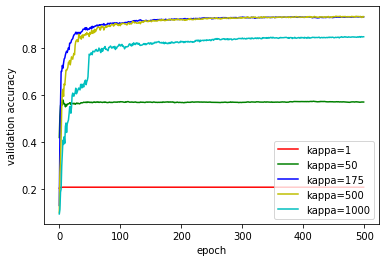

<Figure size 432x288 with 0 Axes>

In [9]:
df=pd.read_csv('result_log/kappa.csv')  
print(df.keys())
epoch=df['epoch'].tolist()
k1=df['kappa=1acc'].tolist()
k50=df['kappa=50acc'].tolist()
k175=df['kappa=175acc'].tolist()
k500=df['kappa=500acc'].tolist()
k1000=df['kappa=1000acc'].tolist()

plt.plot(epoch,k1,'r',label='kappa=1')
plt.plot(epoch,k50,'g',label='kappa=50')
plt.plot(epoch,k175,'b',label='kappa=175')
plt.plot(epoch,k500,'y',label='kappa=500')
plt.plot(epoch,k1000,'c',label='kappa=1000')

plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.savefig('result_log/kappa.png')

### B.4. Network

Get the result

In [7]:
# Set batch size to 1000
torch.manual_seed(100)
batch_size = 1000
train_input, train_target, test_input, test_target = load_data(train_size=60000, test_size=10000, cifar = None,  normalize = False, flatten = True)
train_loader = DataLoader(list(zip(train_input, train_target)), batch_size)
test_loader = DataLoader(list(zip(test_input, test_target)), batch_size)

hidden_unit=[64,128,256,512,1024]
kappa_list=[125,175,200,250,300]
epochnum=[150,300,230,375,350]
record_acc=[]
record_time=[]
record_sparsity=[]


for i in range(5):
    torch.manual_seed(100)
    time_start=time.time()
    model = MLP(input_channels = 14*14, output_channels = 10, hidden_units=hidden_unit[i])
    optimizer = SGD(model.parameters(),  kappa = kappa_list[i], step_size=1, project = False, FW = True)
    loss_tr_hist, loss_te_hist, acc_train_hist, acc_test_hist, sparsity = train(train_loader, test_loader,
              model, optimizer, criterion, epochs=epochnum[i], ifsparsity=True)
    time_end=time.time()
    record_acc.append(max(acc_test_hist))
    record_time.append(float(time_end-time_start)/epochnum[i])
    record_sparsity.append(sparsity)

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 60000 train and 10000 test samples


Epoch 1/150:   0%|          | 0/60000 [00:00<?, ?img/s]C:\Users\86131\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Epoch 53/150: 100%|██████████| 60000/60000 [00:01<00:00, 51375.23img/s, test accuracy=0.893, test loss=10.3, train acccuracy=0.899, train loss=61.3]


Epoch 108/150: 100%|██████████| 60000/60000 [00:01<00:00, 47784.26img/s, test accuracy=0.911, test loss=9.92, train acccuracy=0.919, train loss=59]


Epoch 12/300: 100%|██████████| 60000/60000 [00:01<00:00, 40403.19img/s, test accuracy=0.779, test loss=11.9, train acccuracy=0.779, train loss=71.8]


Epoch 67/300: 100%|██████████| 60000/60000 [00:01<00:00, 39631.41img/s, test accuracy=0.897, test loss=9.96, train acccuracy=0.898, train loss=59.7]


Epoch 122/300: 100%|██████████| 60000/60000 [00:01<00:00, 40782.74img/s, test accuracy=0.913, test loss=9.69, train acccuracy=0.92, train loss=57.8]


Epoch 176/300: 100%|██████████| 60000/60000 [00:01<00:00, 40241.15img/s, test accuracy=0.92, test loss=9.6, train acccuracy=0.929, train loss=56.9]


Epoch 230/300: 100%|██████████| 60000/60000 [00:01<00:00, 40075.96img/s, test accuracy=0.923, test loss=9.5, train acccuracy=0.934, train loss=56.3]


Epoch 284/300: 100%|██████████| 60000/60000 [00:01<00:00, 36982.06img/s, test accuracy=0.926, test loss=9.47, train acccuracy=0.937, train loss=56]


Epoch 39/230: 100%|██████████| 60000/60000 [00:01<00:00, 32396.59img/s, test accuracy=0.887, test loss=10.2, train acccuracy=0.884, train loss=61.7]


Epoch 94/230: 100%|██████████| 60000/60000 [00:01<00:00, 32344.32img/s, test accuracy=0.918, test loss=9.66, train acccuracy=0.918, train loss=57.9]


Epoch 148/230: 100%|██████████| 60000/60000 [00:01<00:00, 31291.28img/s, test accuracy=0.929, test loss=9.49, train acccuracy=0.929, train loss=56.8]


Epoch 202/230: 100%|██████████| 60000/60000 [00:01<00:00, 31026.57img/s, test accuracy=0.929, test loss=9.43, train acccuracy=0.934, train loss=56.2]


Epoch 27/375: 100%|██████████| 60000/60000 [00:04<00:00, 12257.03img/s, test accuracy=0.818, test loss=10.9, train acccuracy=0.821, train loss=65.3]


Epoch 82/375: 100%|██████████| 60000/60000 [00:04<00:00, 13841.21img/s, test accuracy=0.905, test loss=9.81, train acccuracy=0.908, train loss=58.6]


Epoch 136/375: 100%|██████████| 60000/60000 [00:04<00:00, 12846.18img/s, test accuracy=0.926, test loss=9.47, train acccuracy=0.927, train loss=56.6]


Epoch 190/375: 100%|██████████| 60000/60000 [00:04<00:00, 13990.80img/s, test accuracy=0.931, test loss=9.36, train acccuracy=0.935, train loss=55.7]


Epoch 244/375: 100%|██████████| 60000/60000 [00:04<00:00, 13195.12img/s, test accuracy=0.932, test loss=9.33, train acccuracy=0.939, train loss=55.3]


Epoch 298/375: 100%|██████████| 60000/60000 [00:04<00:00, 12854.79img/s, test accuracy=0.933, test loss=9.27, train acccuracy=0.942, train loss=55]


Epoch 352/375: 100%|██████████| 60000/60000 [00:04<00:00, 13448.45img/s, test accuracy=0.934, test loss=9.27, train acccuracy=0.945, train loss=54.8]


Epoch 32/350: 100%|██████████| 60000/60000 [00:12<00:00, 4821.86img/s, test accuracy=0.861, test loss=10.5, train acccuracy=0.861, train loss=63.3]


Epoch 87/350: 100%|██████████| 60000/60000 [00:11<00:00, 5129.21img/s, test accuracy=0.911, test loss=9.7, train acccuracy=0.913, train loss=58.1]


Epoch 142/350: 100%|██████████| 60000/60000 [00:15<00:00, 3819.91img/s, test accuracy=0.925, test loss=9.46, train acccuracy=0.927, train loss=56.6]


Epoch 197/350: 100%|██████████| 60000/60000 [00:13<00:00, 4397.45img/s, test accuracy=0.93, test loss=9.37, train acccuracy=0.934, train loss=55.7]


Epoch 252/350: 100%|██████████| 60000/60000 [00:13<00:00, 4383.58img/s, test accuracy=0.933, test loss=9.26, train acccuracy=0.941, train loss=54.9]


Epoch 307/350: 100%|██████████| 60000/60000 [00:12<00:00, 4659.12img/s, test accuracy=0.933, test loss=9.26, train acccuracy=0.943, train loss=54.7]


Epoch 350/350: 100%|██████████| 60000/60000 [00:14<00:00, 4014.80img/s, test accuracy=0.935, test loss=9.24, train acccuracy=0.943, train loss=54.7]


In [8]:
print('acc: ',record_acc)
print('average time per epoch: ',record_time)
print('sparsity: ',record_sparsity)

acc:  [0.9213, 0.9286, 0.9325, 0.9373, 0.9367]
average time per epoch:  [1.2307508420944213, 1.521327026685079, 1.8955349580101344, 4.492006628672282, 13.39387309551239]
sparsity:  [0.7646687334940866, 0.8890464456739039, 0.9529774231021769, 0.9835019666350197, 0.9944775511304097]


### C. Hyperparameter and l-p norm in Projected SGD

### C.1.learning rate

In [6]:
torch.manual_seed(100)
batch_size = 100
train_input, train_target, test_input, test_target = load_data(train_size=60000, test_size=1000, cifar = None,  normalize = False, flatten = True)
train_loader = DataLoader(list(zip(train_input, train_target)), batch_size)
test_loader = DataLoader(list(zip(test_input, test_target)), batch_size)
df=pd.DataFrame()
criterion = nn.CrossEntropyLoss()

df=pd.DataFrame()
criterion = nn.CrossEntropyLoss()
lr = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
for i in range(len(lr)):
    torch.manual_seed(100)
    model=MLP(input_channels=14*14, output_channels=10)
    optimizer=SGD(model.parameters(), kappa = 500, l=1, project =True, FW = False , lr = lr[i])
    loss_tr_hist, loss_te_hist, acc_train_hist, acc_test_hist = train(train_loader, test_loader,
                                                                    model, optimizer, criterion, epochs=60)
    df['lr='+str(i)]=acc_test_hist
df.to_csv("result_log/lr.csv",index=True)

Epoch 1/60:   0%|          | 0/60000 [00:00<?, ?img/s]/Users/maxiaoqi/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Epoch 49/60: 100%|██████████| 60000/60000 [00:03<00:00, 19167.29img/s, test accuracy=0.921, test loss=100, train acccuracy=0.926, train loss=598]


Epoch 41/60: 100%|██████████| 60000/60000 [00:03<00:00, 18908.80img/s, test accuracy=0.963, test loss=87.6, train acccuracy=0.973, train loss=515]


Epoch 32/60: 100%|██████████| 60000/60000 [00:03<00:00, 16448.28img/s, test accuracy=0.887, test loss=99.6, train acccuracy=0.885, train loss=600]


Epoch 23/60: 100%|██████████| 60000/60000 [00:03<00:00, 18018.29img/s, test accuracy=0.103, test loss=230, train acccuracy=0.0993, train loss=1.38e+3]


Epoch 11/60: 100%|██████████| 60000/60000 [00:01<00:00, 34736.11img/s, test accuracy=0.101, test loss=230, train acccuracy=0.0992, train loss=1.38e+3]


Epoch 60/60: 100%|██████████| 60000/60000 [00:01<00:00, 34593.42img/s, test accuracy=0.101, test loss=230, train acccuracy=0.0992, train loss=1.38e+3]


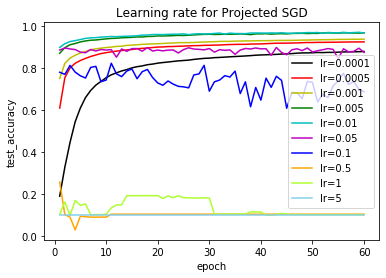

In [24]:
df=pd.read_csv("result_log/lr.csv")
epoch=np.linspace(1,60,60).astype('uint8')

l0=df['lr=0'].tolist()
l1=df['lr=1'].tolist()
l2=df['lr=2'].tolist()
l3=df['lr=3'].tolist()
l4=df['lr=4'].tolist()
l5=df['lr=5'].tolist()
l6=df['lr=6'].tolist()
l7=df['lr=7'].tolist()
l8=df['lr=8'].tolist()
l9=df['lr=9'].tolist()


plt.plot(epoch,l0,'k',label='lr=0.0001')
plt.plot(epoch,l1,'r',label='lr=0.0005')
plt.plot(epoch,l2,'y',label='lr=0.001')
plt.plot(epoch,l3,'g',label='lr=0.005')
plt.plot(epoch,l4,'c',label='lr=0.01')
plt.plot(epoch,l5,'m',label='lr=0.05')
plt.plot(epoch,l6,'b',label='lr=0.1')
plt.plot(epoch,l7,'orange',label='lr=0.5')
plt.plot(epoch,l8,'greenyellow',label='lr=1')
plt.plot(epoch,l9,'skyblue',label='lr=5')

plt.xlabel('epoch')
plt.ylabel('test_accuracy')
plt.legend()
plt.title("Learning rate for Projected SGD")
plt.show()
#plt.savefig("lr_pro.png")

### C.2 Projected L1-sgd, Projected L2-sgd,sgd

In [12]:

torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_sgd=SGD(model.parameters(), kappa = 500, l=1, project =False, FW = False , lr = 0.01)
loss_tr_sgd, loss_te_sgd, acc_train_sgd, acc_test_sgd = train(train_loader, test_loader,
          model, optimizer_sgd, criterion, epochs=60)
df['loss=1']=loss_te_sgd
df['test=1']=acc_test_sgd

torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_sgd1=SGD(model.parameters(), kappa = 500, l=1, project =True, FW = False , lr = 0.01)
loss_tr_sgd1, loss_te_sgd1, acc_train_sgd1, acc_test_sgd1 = train(train_loader, test_loader,
          model, optimizer_sgd1, criterion, epochs=60)
df['loss=2']=loss_te_sgd1
df['test=2']=acc_test_sgd1

torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_sgd2=SGD(model.parameters(), kappa = 5, l=2, project =True, FW = False , lr = 0.01)
loss_tr_sgd2, loss_te_sgd2, acc_train_sgd2, acc_test_sgd2 = train(train_loader, test_loader,
          model, optimizer_sgd2, criterion, epochs=60)
df['loss=3']=loss_te_sgd2
df['test=3']=acc_test_sgd2

df.to_csv("result_log/project_norm.csv",index=True)

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 60000 train and 1000 test samples


Epoch 50/60: 100%|██████████| 60000/60000 [00:03<00:00, 19066.46img/s, test accuracy=0.976, test loss=8.51, train acccuracy=0.975, train loss=511]


Epoch 60/60: 100%|██████████| 60000/60000 [00:01<00:00, 40530.52img/s, test accuracy=0.971, test loss=8.54, train acccuracy=0.979, train loss=507]


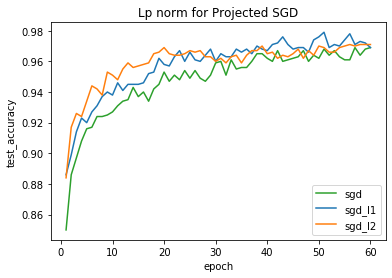

In [15]:
df=pd.read_csv("result_log/project_norm.csv")
epoch=np.linspace(1,60,60).astype('uint8')
p1=df['test=1'].tolist()
p2=df['test=2'].tolist()
p3=df['test=3'].tolist()
plt.plot(epoch,p1,'tab:green',label='sgd')
plt.plot(epoch,p2,'tab:blue',label='sgd_l1')
plt.plot(epoch,p3,'tab:orange',label='sgd_l2')

plt.xlabel('epoch')
plt.ylabel('test_accuracy')
plt.legend()
plt.title("Lp norm for Projected SGD")
#plt.savefig("pro_l12.png")


### C.3 optimizer comparison

In [25]:
batch_size = 100
df=pd.DataFrame()
criterion = nn.CrossEntropyLoss()


torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_sgd=optimizer = SGD(model.parameters(), kappa = 500, l=1, project =True,lr = 0.01)
loss_tr_sgd, loss_te_sgd, acc_train_sgd, acc_test_sgd = train(train_loader, test_loader,
          model, optimizer_sgd, criterion, epochs=60)
df['loss=1']=loss_te_sgd
df['test=1']=acc_test_sgd

torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_sgdm=SGD_Momentum(model.parameters(), kappa = 500, l=1, project =True, lr = 0.01, momentum = 0.01)
loss_tr_sgdm, loss_te_sgdm, acc_train_sgdm, acc_test_sgdm = train(train_loader, test_loader,
          model, optimizer_sgdm, criterion, epochs=60)
df['loss=2']=loss_te_sgdm
df['test=2']=acc_test_sgdm

torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_rms=RMSprop(model.parameters(), kappa=500, l=1, project= True, lr=0.0002 ,delta=0.0001,weight_decay=0.01)
loss_tr_rms, loss_te_rms, acc_train_rms, acc_test_rms = train(train_loader, test_loader,
          model, optimizer_rms, criterion, epochs=60)
df['loss=3']=loss_te_rms
df['test=3']=acc_test_rms

torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_ada=AdaGrad(model.parameters(), kappa=500, l=1, project= True, lr= 0.0002,delta=0.0001,weight_decay=0.01)
loss_tr_ada, loss_te_ada, acc_train_ada, acc_test_ada = train(train_loader, test_loader,
          model, optimizer_ada, criterion, epochs=60)
df['loss=4']=loss_te_ada
df['test=4']=acc_test_ada

torch.manual_seed(100)
model=MLP(input_channels=14*14, output_channels=10)
optimizer_adam=ADAM(model.parameters(), kappa=500, l=1, project= True, lr= 0.0002,delta=0.0000001,weight_decay=0.01)
loss_tr_adam, loss_te_adam, acc_train_adam, acc_test_adam = train(train_loader, test_loader,
          model, optimizer_adam, criterion, epochs=60)
df['loss=5']=loss_te_adam
df['test=5']=acc_test_adam
df.to_csv("result_log/opt.csv",index=True)

Epoch 50/60: 100%|██████████| 60000/60000 [00:03<00:00, 16594.30img/s, test accuracy=0.973, test loss=8.54, train acccuracy=0.974, train loss=511]


Epoch 40/60: 100%|██████████| 60000/60000 [00:03<00:00, 16259.20img/s, test accuracy=0.94, test loss=8.93, train acccuracy=0.957, train loss=526]


Epoch 60/60: 100%|██████████| 60000/60000 [00:03<00:00, 18135.02img/s, test accuracy=0.966, test loss=8.61, train acccuracy=0.972, train loss=508]


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

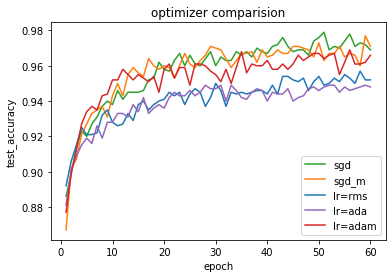

In [32]:
df=pd.read_csv("result_log/opt.csv")
o1=df['test=1'].tolist()
o2=df['test=2'].tolist()
o3=df['test=3'].tolist()
o4=df['test=4'].tolist()
o5=df['test=5'].tolist()

plt.plot(epoch,o1,'tab:green',label='sgd')
plt.plot(epoch,o2,'tab:orange',label='sgd_m')
plt.plot(epoch,o3,'tab:blue',label='lr=rms')
plt.plot(epoch,o4,'tab:purple',label='lr=ada')
plt.plot(epoch,o5,'tab:red',label='lr=adam')

plt.xlabel('epoch')
plt.ylabel('test_accuracy')
plt.legend()
plt.title("optimizer comparison")
plt.imshow
#plt.savefig("optimizer_comp.png")
